In [9]:
import pandas as pd
import os

# Get the directory where the script is running
# This assumes your CSV files are in the same folder as the script
current_directory = './onway/episode_logs3' 

# --- A function to process a single DataFrame ---
def process_dataframe(df):
    """Applies the required transformations to the dataframe."""
    
    # Check if required columns exist before proceeding
    if 'forecast' not in df.columns or 'rainfall_7day' not in df.columns:
        print(f"  ...Skipping file: Does not contain 'forecast' or 'rainfall_7day' columns.")
        return None # Return None to indicate failure

    # 1. Create the 'daily_precip' column from the previous day's forecast
    df['daily_precip'] = df['forecast'].shift(1)

    # 2. Set the first day's precip value from the 'rainfall_7day' column
    # Using .loc is slightly safer for assignment
    df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    # 3. Pop the 'daily_precip' column to move it
    daily_precip = df.pop('daily_precip')

    # 4. Insert the column at the 3rd position (index 2)
    df.insert(2, 'daily_precip', daily_precip)
    
    return df

# --- Main Script Logic ---

print(f"Scanning for CSV files in the directory: {os.path.abspath(current_directory)}\n")

# Loop through every file in the current directory
for filename in os.listdir(current_directory):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        print(f"Processing file: {filename}")
        
        # Create the full path to the file
        file_path = os.path.join(current_directory, filename)
        
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Process the DataFrame using the function
            updated_df = process_dataframe(df)
            
            # If the processing was successful, save the file
            if updated_df is not None:
                # Save the changes back to the same file, overwriting it
                updated_df.to_csv(file_path, index=False)
                print(f"  -> Successfully updated and saved {filename}")

        except Exception as e:
            # Catch potential errors like empty files or read/write issues
            print(f"  ...An error occurred while processing {filename}: {e}")

print("\nBatch processing complete!")

Scanning for CSV files in the directory: d:\Final-Year-Project\rl-trails\onway\episode_logs3

Processing file: episode_0001_log.csv
  -> Successfully updated and saved episode_0001_log.csv
Processing file: episode_0002_log.csv
  -> Successfully updated and saved episode_0002_log.csv
Processing file: episode_0003_log.csv
  -> Successfully updated and saved episode_0003_log.csv
Processing file: episode_0004_log.csv
  -> Successfully updated and saved episode_0004_log.csv
Processing file: episode_0005_log.csv
  -> Successfully updated and saved episode_0005_log.csv
Processing file: episode_0006_log.csv
  -> Successfully updated and saved episode_0006_log.csv
Processing file: episode_0007_log.csv
  -> Successfully updated and saved episode_0007_log.csv
Processing file: episode_0008_log.csv
  -> Successfully updated and saved episode_0008_log.csv
Processing file: episode_0009_log.csv
  -> Successfully updated and saved episode_0009_log.csv
Processing file: episode_0010_log.csv
  -> Successf

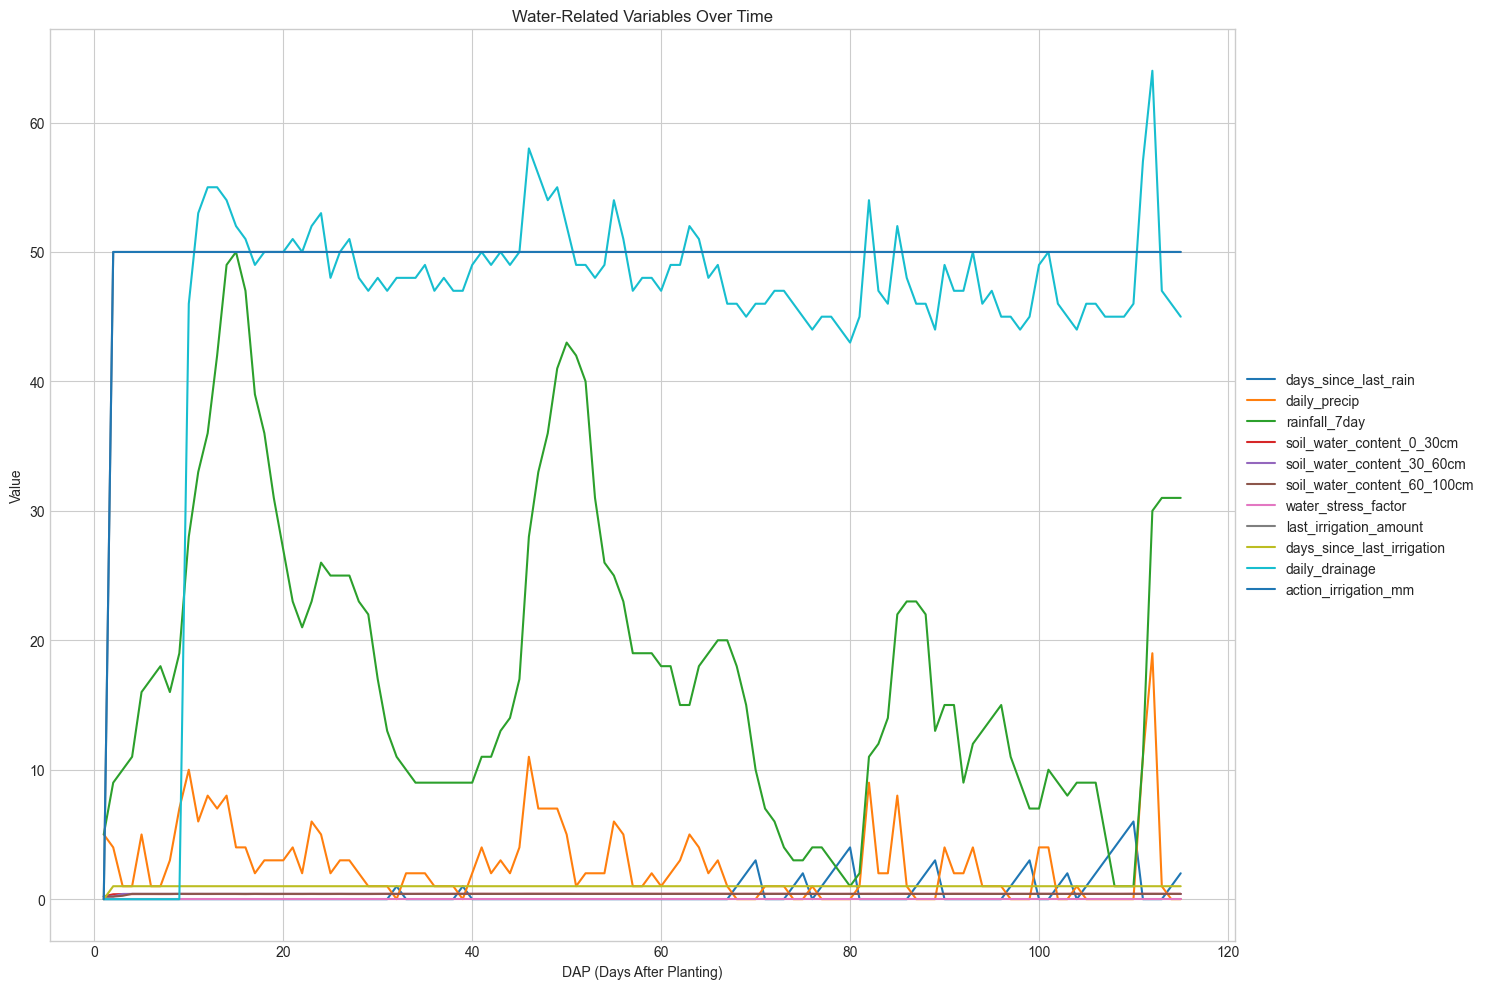

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. Define the File and Columns ---

# The name of the CSV file you want to use
filename = './onway/episode_logs3/episode_0009_log.csv' 

# List of water-related columns to plot
water_columns = [
    'days_since_last_rain',
    'daily_precip',
    'rainfall_7day',
    'soil_water_content_0_30cm',
    'soil_water_content_30_60cm',
    'soil_water_content_60_100cm',
    'water_stress_factor',
    'last_irrigation_amount',
    'days_since_last_irrigation',
    'daily_drainage',
    'action_irrigation_mm'
]

# --- 2. Read the File and Create the Graph ---

# Check if the file exists in the current directory
if os.path.exists(filename):
    # Read the data from the CSV file into a DataFrame
    df = pd.read_csv(filename)
    
    # Before plotting, create the 'daily_precip' column if it doesn't exist
    if 'daily_precip' not in df.columns:
        df['daily_precip'] = df['forecast'].shift(1)
        df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    # Set the visual style for the plot
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create a figure and axes for the plot (making it larger for readability)
    fig, ax = plt.subplots(figsize=(15, 10))

    # --- 3. Plot Each Water-Related Column ---
    
    for column in water_columns:
        # Check if the column exists in the DataFrame to avoid errors
        if column in df.columns:
            ax.plot(df['DAP'], df[column], label=column)

    # --- 4. Customize and Display the Plot ---

    # Set the labels for the axes and the title for the chart
    ax.set_xlabel('DAP (Days After Planting)')
    ax.set_ylabel('Value')
    ax.set_title('Water-Related Variables Over Time')

    # Add a legend to the plot to identify the different lines
    # Place the legend outside the plot area to avoid covering data
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Adjust the plot layout to make sure everything fits
    plt.tight_layout()

    # Display the graph
    plt.show()

else:
    print(f"Error: The file '{filename}' was not found.")
    print("Please make sure the script is in the same directory as your CSV file.")

Normalizing and plotting water variables...
Adding scaled biomass indicator line...


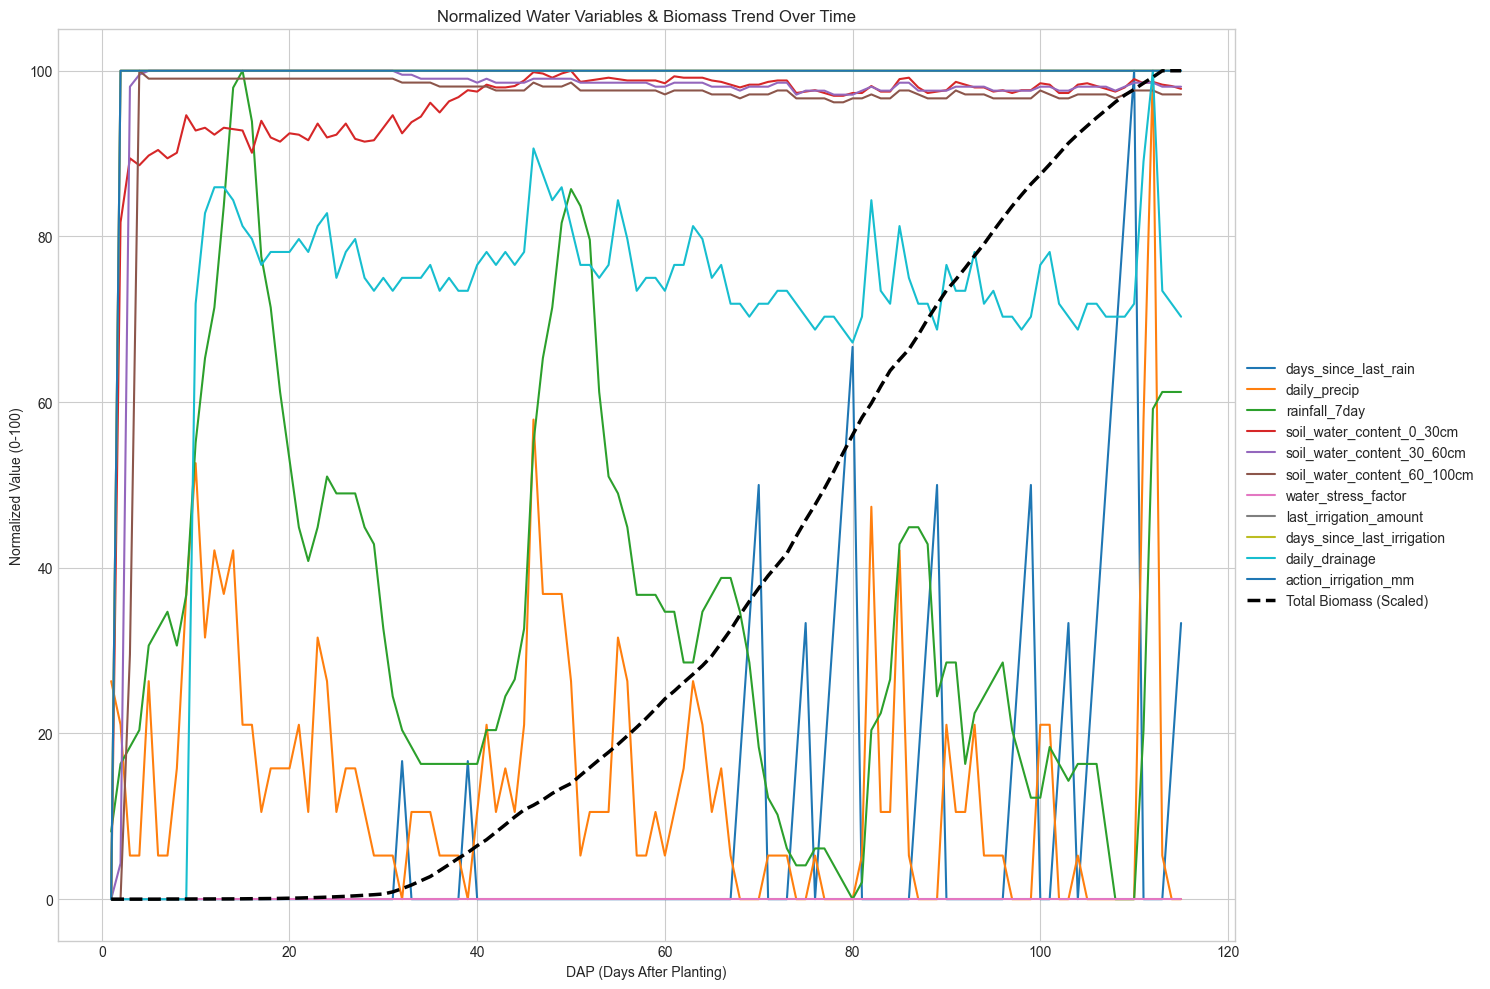

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. Define the File and Columns ---

# The name of the CSV file you want to use
filename = './onway/episode_logs3/episode_0009_log.csv' 

# List of water-related columns to plot
water_columns = [
    'days_since_last_rain',
    'daily_precip',
    'rainfall_7day',
    'soil_water_content_0_30cm',
    'soil_water_content_30_60cm',
    'soil_water_content_60_100cm',
    'water_stress_factor',
    'last_irrigation_amount',
    'days_since_last_irrigation',
    'daily_drainage',
    'action_irrigation_mm'
]

# --- 2. Read the File and Prepare Data ---

if os.path.exists(filename):
    # Read the data from the CSV file into a DataFrame
    df = pd.read_csv(filename)
    
    # Create the 'daily_precip' column if it doesn't already exist
    if 'daily_precip' not in df.columns:
        if 'forecast' in df.columns and 'rainfall_7day' in df.columns:
            df['daily_precip'] = df['forecast'].shift(1)
            df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']
        else:
            print("Cannot create 'daily_precip': 'forecast' or 'rainfall_7day' column is missing.")

    # Set the visual style for the plot
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # --- 3. Normalize and Plot Each Water-Related Column ---
    
    print("Normalizing and plotting water variables...")
    for column in water_columns:
        if column in df.columns:
            min_val = df[column].min()
            max_val = df[column].max()
            
            # Normalize the column to a 0-100 scale
            # Handle the case where max and min are the same to avoid division by zero
            if (max_val - min_val) > 0:
                df[f'{column}_scaled'] = (df[column] - min_val) / (max_val - min_val) * 100
            else:
                df[f'{column}_scaled'] = 0 # Or 50, if you prefer a middle-ground
            
            # Plot the scaled data
            ax.plot(df['DAP'], df[f'{column}_scaled'], label=column)

    # --- 4. Normalize and Plot the Biomass Indicator Line ---
    
    if 'total_biomass' in df.columns:
        print("Adding scaled biomass indicator line...")
        min_bio = df['total_biomass'].min()
        max_bio = df['total_biomass'].max()
        
        if (max_bio - min_bio) > 0:
            df['biomass_scaled'] = (df['total_biomass'] - min_bio) / (max_bio - min_bio) * 100
        else:
            df['biomass_scaled'] = 0

        # Plot the scaled biomass as a thick, dashed black line
        ax.plot(df['DAP'], df['biomass_scaled'], color='black', linewidth=2.5, linestyle='--', label='Total Biomass (Scaled)')

    # --- 5. Customize and Display the Plot ---

    # Set the labels for the axes and the title for the chart
    ax.set_xlabel('DAP (Days After Planting)')
    ax.set_ylabel('Normalized Value (0-100)')
    ax.set_title('Normalized Water Variables & Biomass Trend Over Time')

    # Add a legend to the plot, placed outside the chart area
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Adjust the plot layout to ensure everything fits
    plt.tight_layout()

    # Display the final graph
    plt.show()

else:
    print(f"Error: The file '{filename}' was not found.")
    print("Please check the path and make sure the file exists.")

Normalizing and plotting water variables with specific colors...
Adding scaled biomass indicator line...


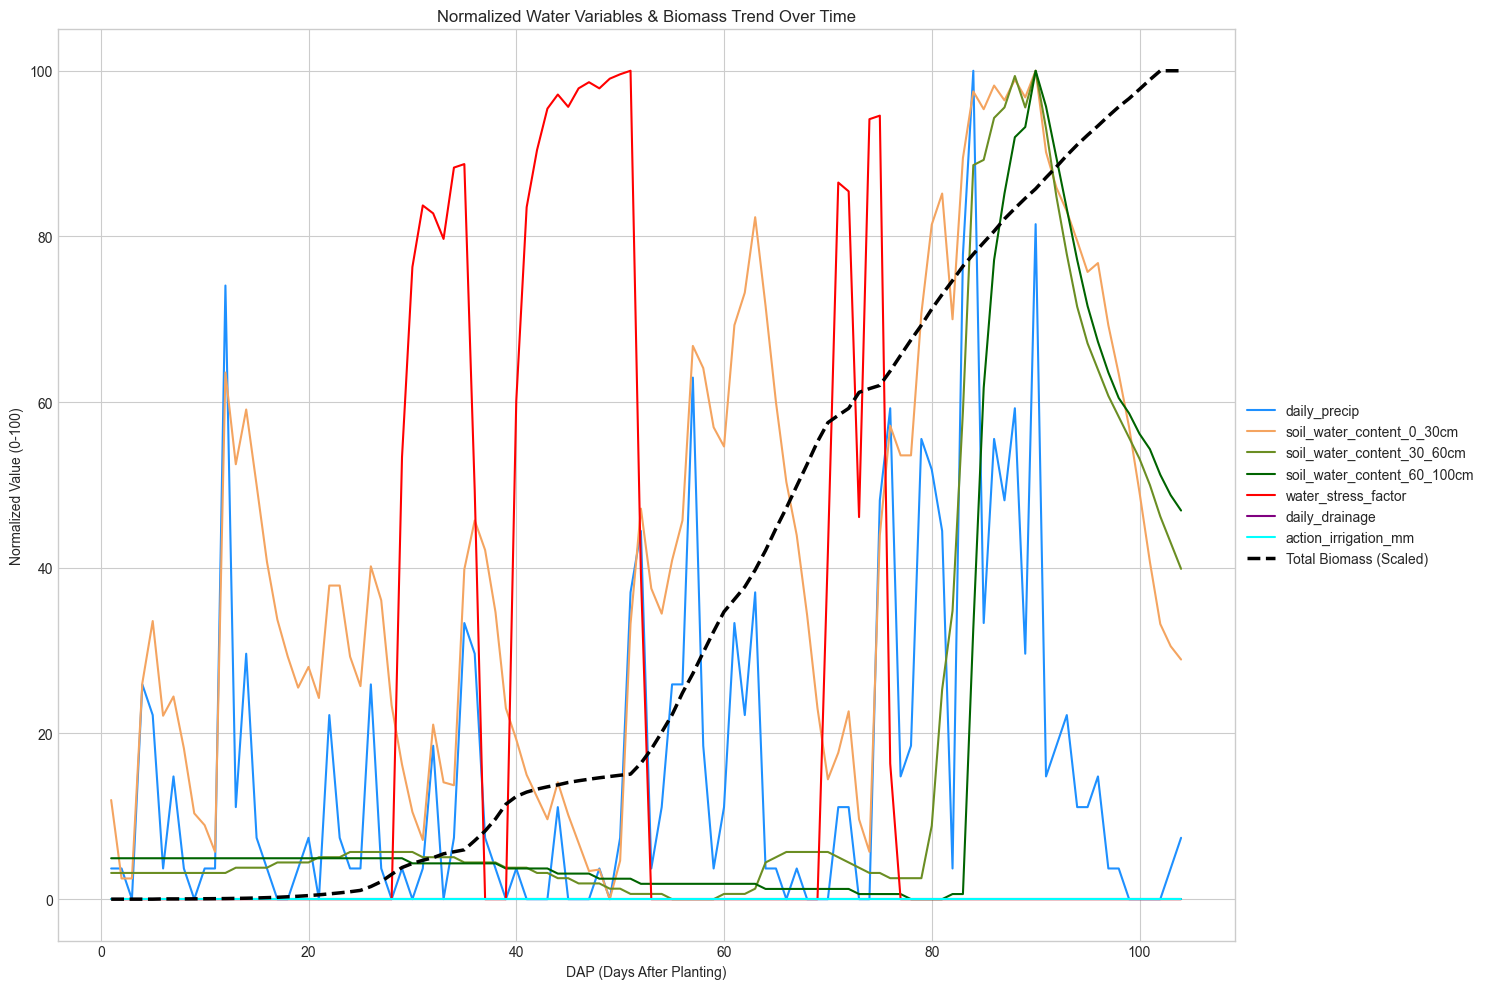

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. Define the File, Columns, and Colors ---

# The name of the CSV file (using a raw string `r''` for Windows paths)
filename = r'D:\Final-Year-Project\rl-trails\onway\episode_logs1\episode_0004_log.csv' 

# List of water-related columns to plot
water_columns = [
    'daily_precip',
    'soil_water_content_0_30cm',
    'soil_water_content_30_60cm',
    'soil_water_content_60_100cm',
    'water_stress_factor',
    'daily_drainage',
    'action_irrigation_mm'
]

# Assign a specific color to each column
color_map = {
    'daily_precip': 'dodgerblue',
    'soil_water_content_0_30cm': 'sandybrown',
    'soil_water_content_30_60cm': 'olivedrab',
    'soil_water_content_60_100cm': 'darkgreen',
    'water_stress_factor': 'red',
    'daily_drainage': 'purple',
    'action_irrigation_mm': 'cyan'
}


# --- 2. Read the File and Prepare Data ---

if os.path.exists(filename):
    # Read the data from the CSV file into a DataFrame
    df = pd.read_csv(filename)
    
    # Create 'daily_precip' if it doesn't exist
    if 'daily_precip' not in df.columns:
        if 'forecast' in df.columns and 'rainfall_7day' in df.columns:
            df['daily_precip'] = df['forecast'].shift(1)
            df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']
        else:
            print("Cannot create 'daily_precip': 'forecast' or 'rainfall_7day' column is missing.")

    # Set the visual style
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(15, 10))

    # --- 3. Normalize and Plot Each Water-Related Column with Assigned Colors ---
    
    print("Normalizing and plotting water variables with specific colors...")
    for column in water_columns:
        if column in df.columns:
            min_val = df[column].min()
            max_val = df[column].max()
            
            # Normalize to 0-100
            if (max_val - min_val) > 0:
                df[f'{column}_scaled'] = (df[column] - min_val) / (max_val - min_val) * 100
            else:
                df[f'{column}_scaled'] = 0 
            
            # Plot using the color from the color_map dictionary
            ax.plot(df['DAP'], df[f'{column}_scaled'], label=column, color=color_map.get(column, 'gray'))

    # --- 4. Normalize and Plot the Biomass Indicator Line ---
    
    if 'total_biomass' in df.columns:
        print("Adding scaled biomass indicator line...")
        min_bio = df['total_biomass'].min()
        max_bio = df['total_biomass'].max()
        
        if (max_bio - min_bio) > 0:
            df['biomass_scaled'] = (df['total_biomass'] - min_bio) / (max_bio - min_bio) * 100
        else:
            df['biomass_scaled'] = 0

        # Plot biomass as a dashed black line
        ax.plot(df['DAP'], df['biomass_scaled'], color='black', linewidth=2.5, linestyle='--', label='Total Biomass (Scaled)')

    # --- 5. Customize and Display the Plot ---

    ax.set_xlabel('DAP (Days After Planting)')
    ax.set_ylabel('Normalized Value (0-100)')
    ax.set_title('Normalized Water Variables & Biomass Trend Over Time')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

    plt.show()

else:
    print(f"Error: The file '{filename}' was not found.")
    print("Please check the path and make sure the file exists.")

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

pd.read_csv("./onway/episode_logs2/episode_0001_log.csv").columns

Index(['DAP', 'days_since_last_rain', 'daily_precip', 'rainfall_7day',
       'HarvestIndex', 'phenological_stage', 'leaf_area_index',
       'total_biomass', 'soil_water_content_0_30cm',
       'soil_water_content_30_60cm', 'soil_water_content_60_100cm',
       'available_water_fraction', 'water_stress_factor', 'temperature_avg',
       'solar_radiation', 'last_irrigation_amount',
       'days_since_last_irrigation', 'cumulative_irrigation',
       'totalnumberIrrigation', 'forecast', 'harverst_grain_weight',
       'daily_drainage', 'action_irrigation_mm', 'reward'],
      dtype='object')

Normalizing and plotting water variables...
Adding scaled biomass indicator line...


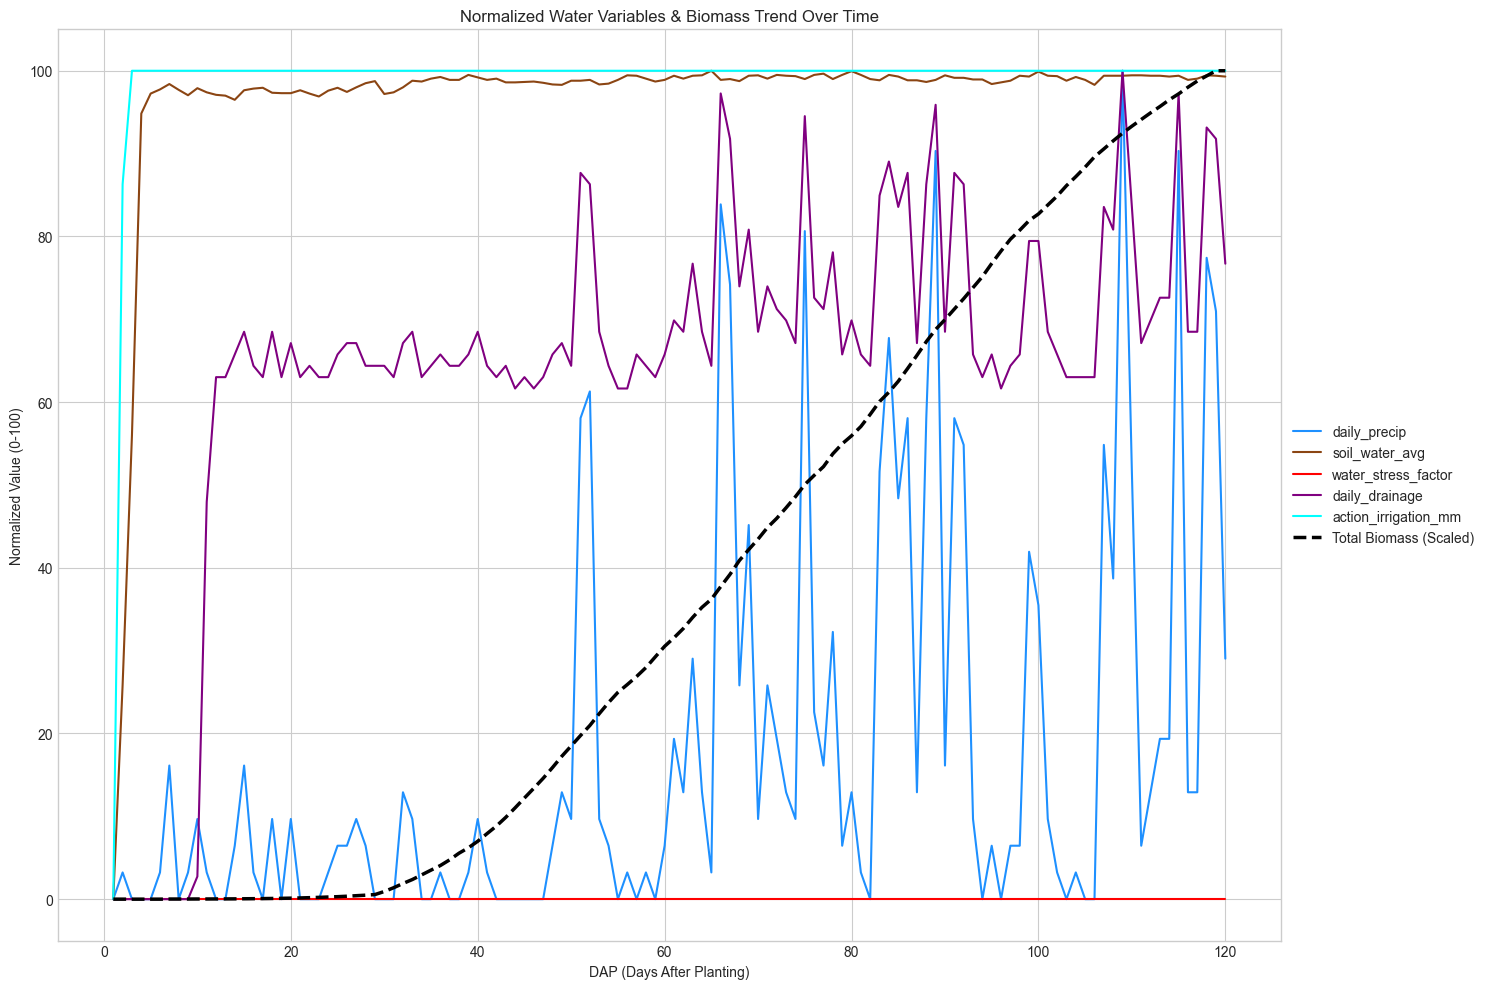

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. Define the File, Columns, and Colors ---

# The name of the CSV file (using a raw string `r''` for Windows paths)
# filename = r'D:\Final-Year-Project\rl-trails\onway\episode_logs1\episode_0004_log.csv'
filename = r'D:\Final-Year-Project\rl-trails\onway\episode_logs3\episode_0015_log.csv'

# List of the three original soil water columns
soil_cols_to_avg = [
    'soil_water_content_0_30cm',
    'soil_water_content_30_60cm',
    'soil_water_content_60_100cm'
]

# Updated list of water-related columns to plot
# Note: 'soil_water_avg' is now included
water_columns = [
    'daily_precip',
    'soil_water_avg', # The new average column
    'water_stress_factor',
    'daily_drainage',
    'action_irrigation_mm'
]

# Assign a specific color to each column
color_map = {
    'daily_precip': 'dodgerblue',
    'soil_water_avg': 'saddlebrown', # Color for the new average line
    'water_stress_factor': 'red',
    'daily_drainage': 'purple',
    'action_irrigation_mm': 'cyan'
}


# --- 2. Read the File and Prepare Data ---

if os.path.exists(filename):
    # Read the data from the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # --- NEW: Calculate the average soil water content ---
    df['soil_water_avg'] = df[soil_cols_to_avg].mean(axis=1)

    # Create 'daily_precip' if it doesn't exist
    if 'daily_precip' not in df.columns:
        if 'forecast' in df.columns and 'rainfall_7day' in df.columns:
            df['daily_precip'] = df['forecast'].shift(1)
            df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']
        else:
            print("Cannot create 'daily_precip': 'forecast' or 'rainfall_7day' column is missing.")

    # Set the visual style
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(15, 10))

    # --- 3. Normalize and Plot Each Water-Related Column with Assigned Colors ---

    print("Normalizing and plotting water variables...")
    for column in water_columns:
        if column in df.columns:
            min_val = df[column].min()
            max_val = df[column].max()

            # Normalize to 0-100
            if (max_val - min_val) > 0:
                df[f'{column}_scaled'] = (df[column] - min_val) / (max_val - min_val) * 100
            else:
                df[f'{column}_scaled'] = 0

            # Plot using the color from the color_map dictionary
            ax.plot(df['DAP'], df[f'{column}_scaled'], label=column, color=color_map.get(column, 'gray'))

    # --- 4. Normalize and Plot the Biomass Indicator Line ---

    if 'total_biomass' in df.columns:
        print("Adding scaled biomass indicator line...")
        min_bio = df['total_biomass'].min()
        max_bio = df['total_biomass'].max()

        if (max_bio - min_bio) > 0:
            df['biomass_scaled'] = (df['total_biomass'] - min_bio) / (max_bio - min_bio) * 100
        else:
            df['biomass_scaled'] = 0

        # Plot biomass as a dashed black line
        ax.plot(df['DAP'], df['biomass_scaled'], color='black', linewidth=2.5, linestyle='--', label='Total Biomass (Scaled)')

    # --- 5. Customize and Display the Plot ---

    ax.set_xlabel('DAP (Days After Planting)')
    ax.set_ylabel('Normalized Value (0-100)')
    ax.set_title('Normalized Water Variables & Biomass Trend Over Time')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

    plt.show()

else:
    print(f"Error: The file '{filename}' was not found.")
    print("Please check the path and make sure the file exists.")

Normalizing and plotting all variables...


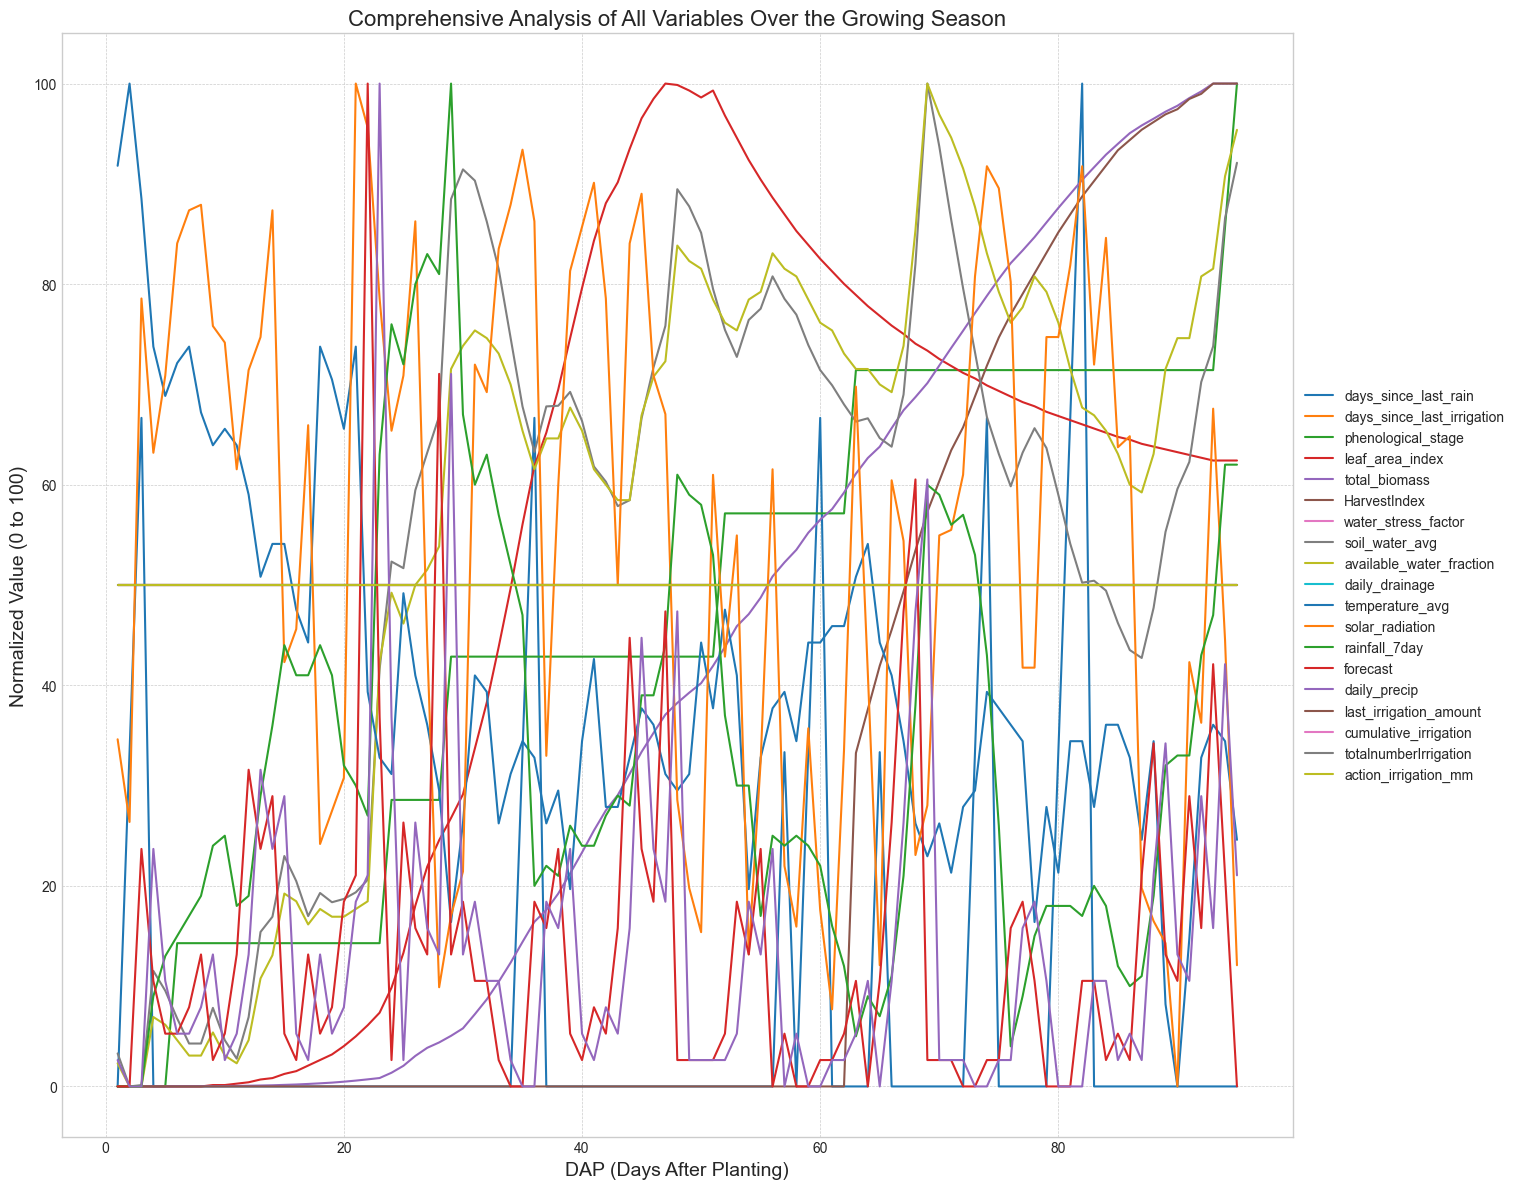


Graph successfully saved as 'comprehensive_variable_graph.png'


Normalizing and plotting variables on separate subplots...


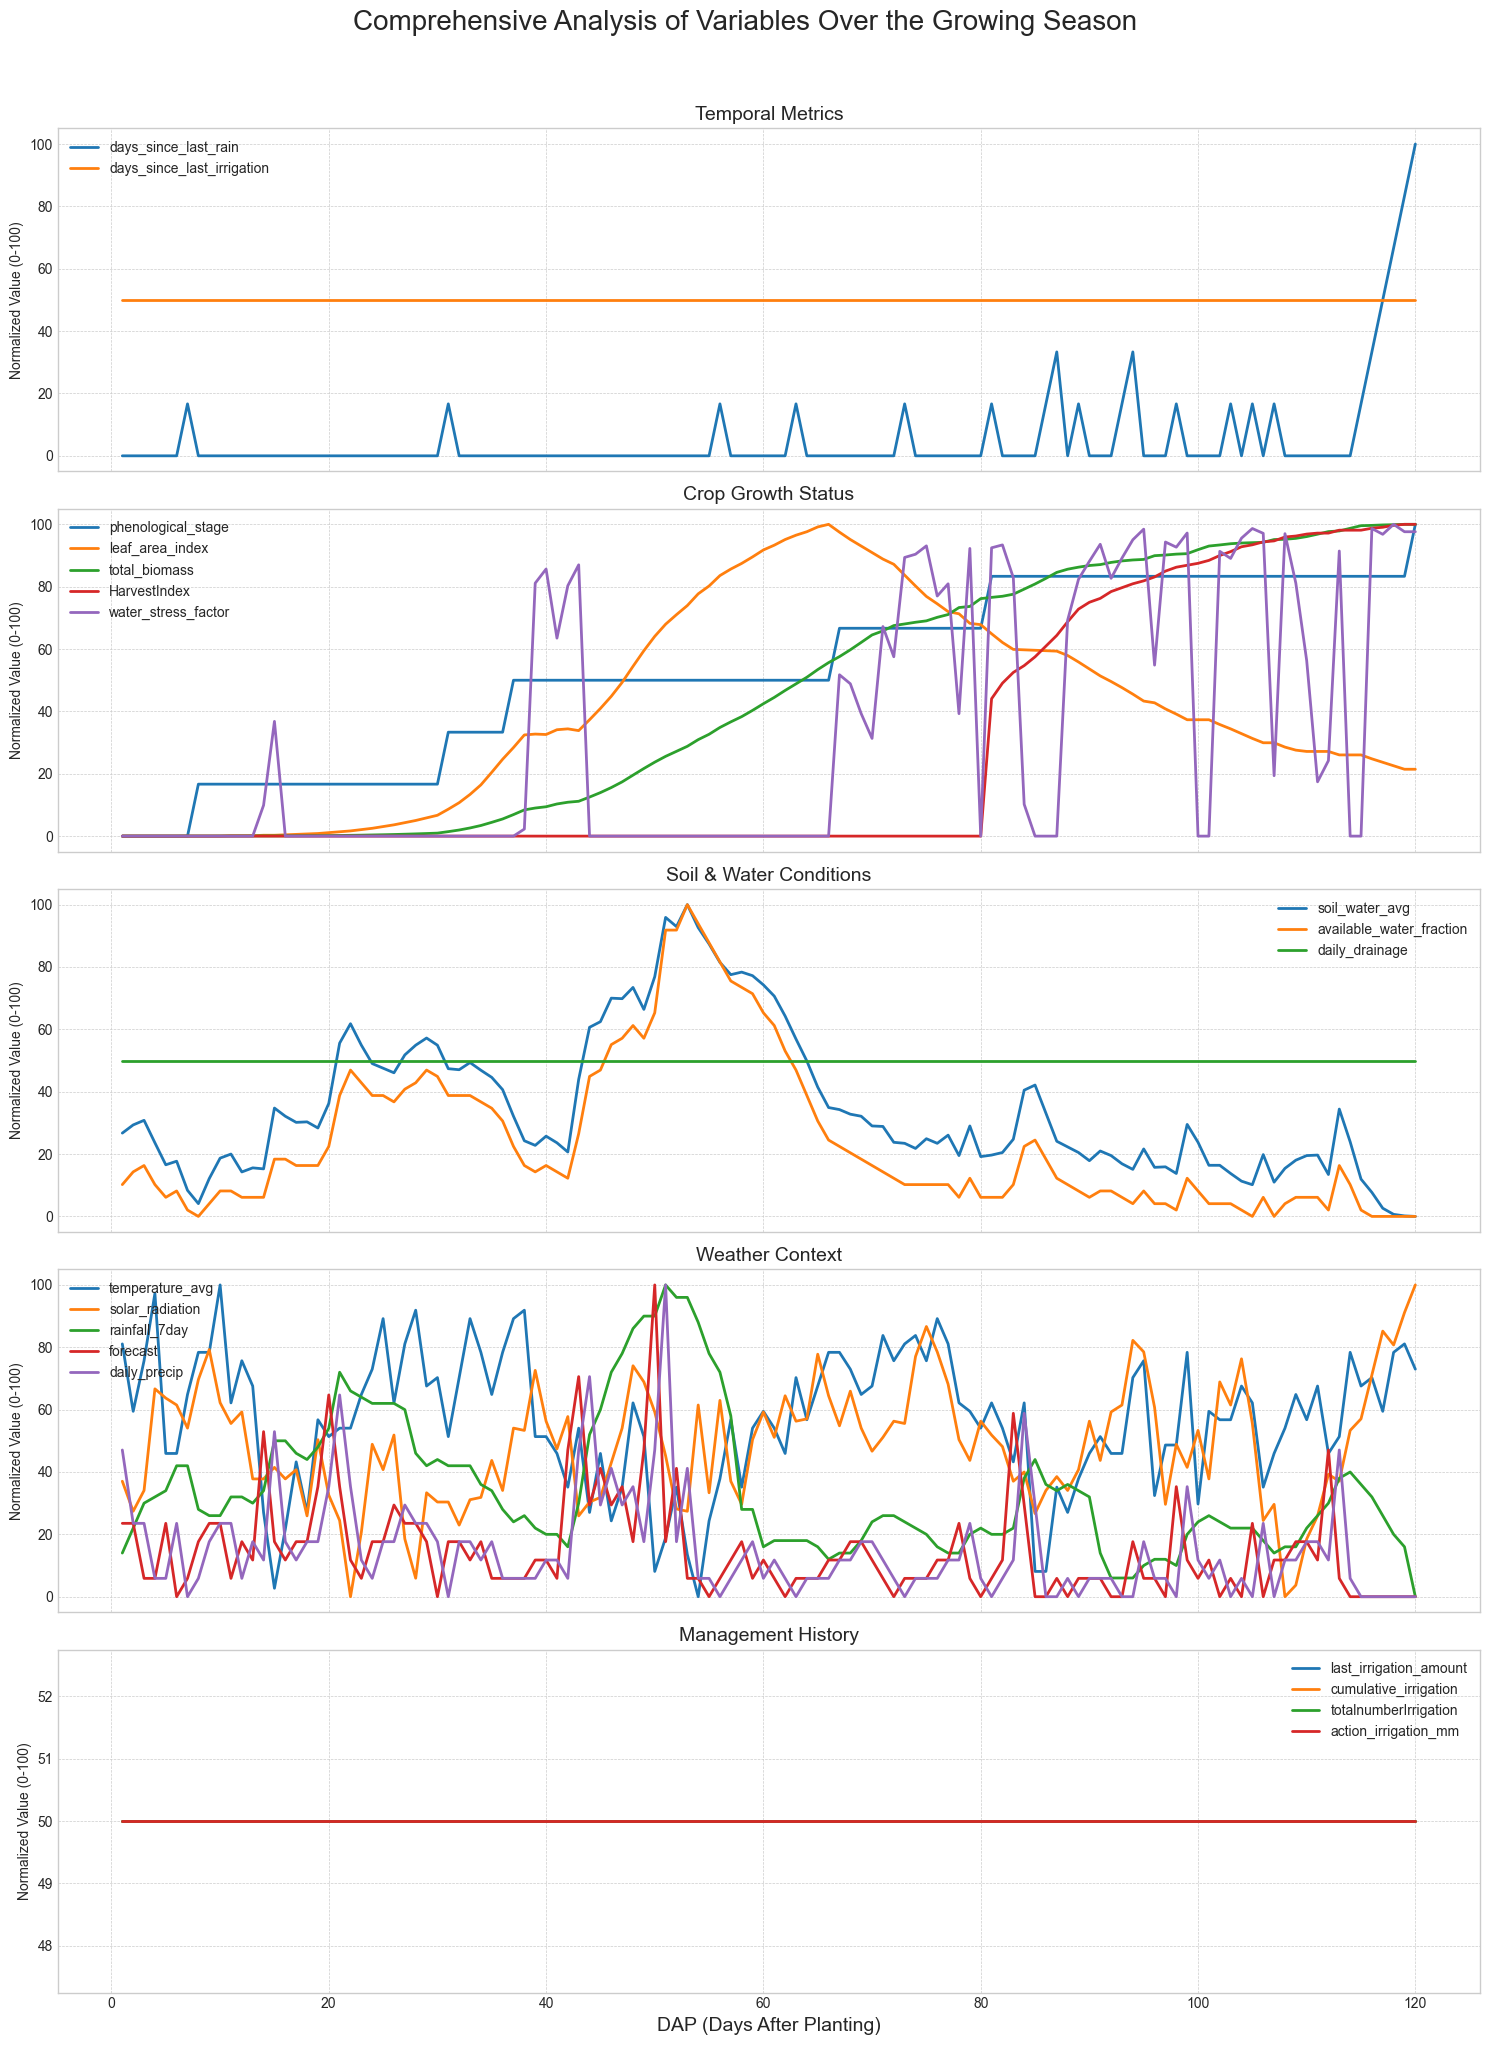


Graph successfully saved as 'comprehensive_subplots_graph.png'


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. Define File and Group Columns for Subplots ---

# IMPORTANT: Update this path to where your file is located
filename = r'./onway/episode_logs1/episode_0010_log.csv'

# Create a dictionary to define the groups for each subplot
subplot_groups = {
    'Temporal Metrics': ['days_since_last_rain', 'days_since_last_irrigation'],
    'Crop Growth Status': ['phenological_stage', 'leaf_area_index', 'total_biomass', 'HarvestIndex', 'water_stress_factor'],
    'Soil & Water Conditions': ['soil_water_avg', 'available_water_fraction', 'daily_drainage'],
    'Weather Context': ['temperature_avg', 'solar_radiation', 'rainfall_7day', 'forecast', 'daily_precip'],
    'Management History': ['last_irrigation_amount', 'cumulative_irrigation', 'totalnumberIrrigation', 'action_irrigation_mm']
}

# --- 2. Read File and Prepare Data ---

if os.path.exists(filename):
    df = pd.read_csv(filename)

    # a. Create 'daily_precip' if it doesn't exist
    if 'daily_precip' not in df.columns:
        df['daily_precip'] = df['forecast'].shift(1)
        df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    # b. Create 'soil_water_avg'
    soil_cols = ['soil_water_content_0_30cm', 'soil_water_content_30_60cm', 'soil_water_content_60_100cm']
    df['soil_water_avg'] = df[soil_cols].mean(axis=1)

    # --- 3. Create the Subplots ---
    # Create 5 subplots arranged vertically, sharing the same x-axis
    fig, axes = plt.subplots(nrows=len(subplot_groups), ncols=1, figsize=(15, 20), sharex=True)
    plt.style.use('seaborn-v0_8-whitegrid')

    # --- 4. Normalize and Plot Data on Each Subplot ---
    print("Normalizing and plotting variables on separate subplots...")

    # Loop through each group and its corresponding subplot axis
    for ax, (title, columns) in zip(axes, subplot_groups.items()):
        ax.set_title(title, fontsize=14)
        ax.set_ylabel('Normalized Value (0-100)')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        for column in columns:
            if column in df.columns:
                min_val = df[column].min()
                max_val = df[column].max()

                # Normalize the column to a 0-100 scale
                if (max_val - min_val) > 0:
                    scaled_column = (df[column] - min_val) / (max_val - min_val) * 100
                else:
                    scaled_column = pd.Series([50] * len(df), index=df.index)

                # Plot the scaled data on the current subplot
                ax.plot(df['DAP'], scaled_column, label=column, lw=2)

        # Add a legend to each subplot
        ax.legend(loc='best')

    # --- 5. Customize and Save the Final Figure ---
    # Set the common x-axis label on the last subplot
    axes[-1].set_xlabel('DAP (Days After Planting)', fontsize=14)

    # Add a main title for the entire figure
    fig.suptitle('Comprehensive Analysis of Variables Over the Growing Season', fontsize=20, y=1.02)

    # Adjust layout to prevent titles and labels from overlapping
    plt.tight_layout()

    # Save the figure to a file
    output_filename = 'comprehensive_subplots_graph.png'
    plt.savefig(output_filename, bbox_inches='tight')

    # Also display the plot
    plt.show()

    print(f"\nGraph successfully saved as '{output_filename}'")

else:
    print(f"Error: The file '{filename}' was not found.")
    print("Please make sure the Python script is in the same directory as your CSV, or provide the full path.")

Normalizing and plotting variables on separate subplots...


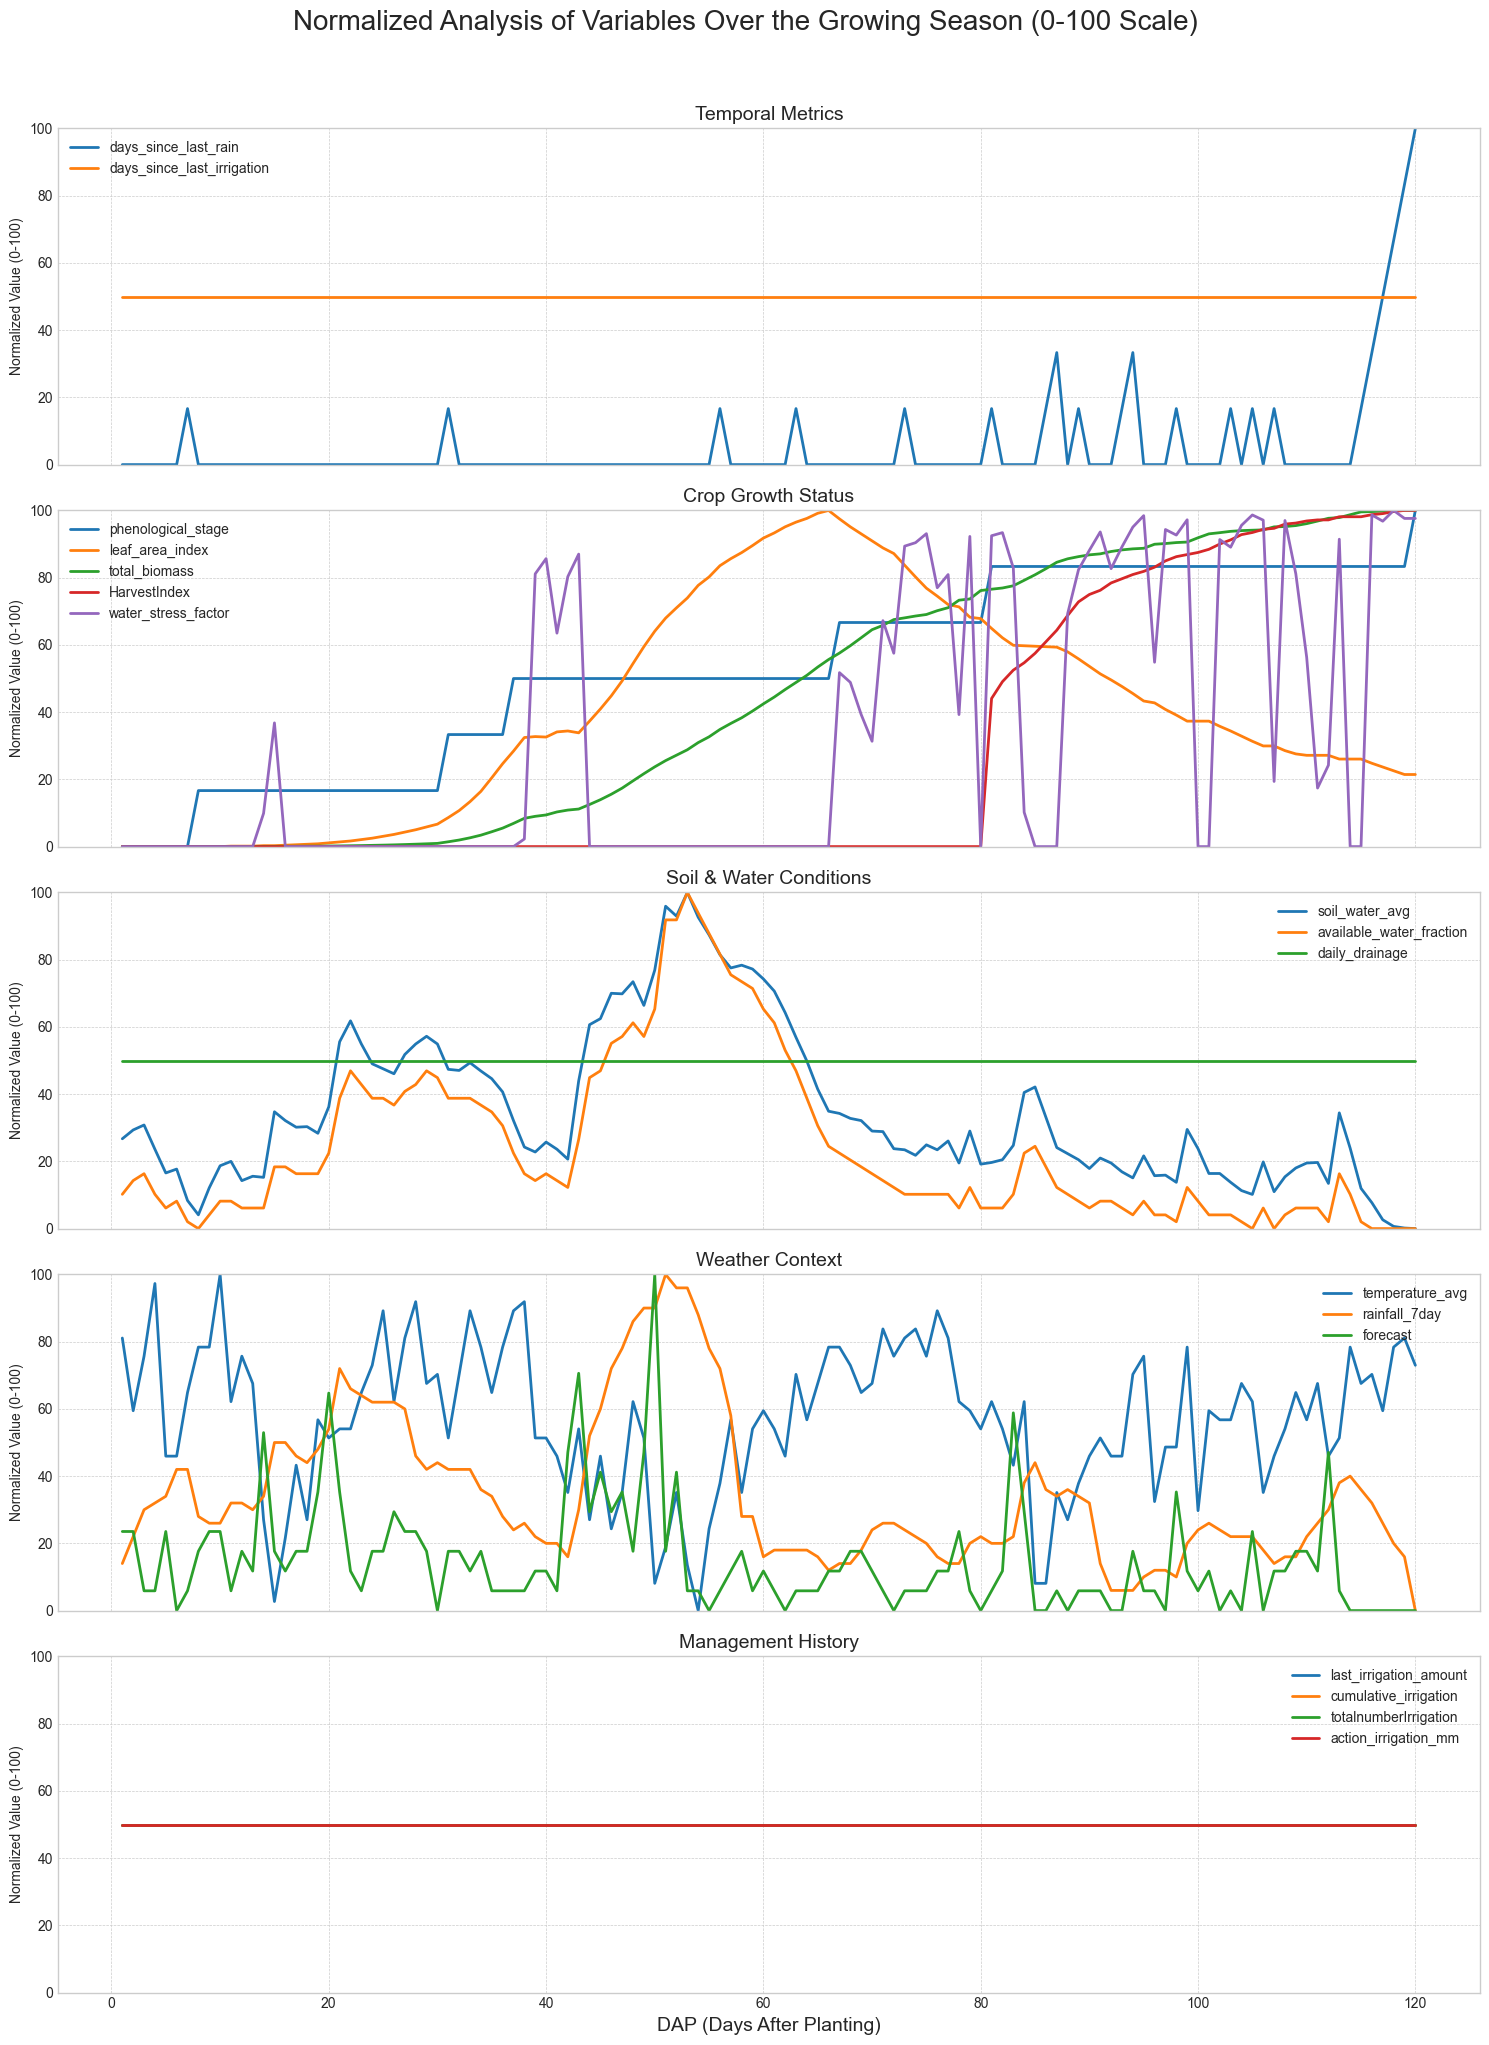


Graph successfully saved as 'normalized_subplots_graph.png'


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. Define File and Group Columns for Subplots ---

# IMPORTANT: Update this path to where your file is located
filename = './onway/episode_logs1/episode_0010_log.csv'

# Dictionary to define the groups for each subplot
subplot_groups = {
    'Temporal Metrics': ['days_since_last_rain', 'days_since_last_irrigation'],
    'Crop Growth Status': ['phenological_stage', 'leaf_area_index', 'total_biomass', 'HarvestIndex', 'water_stress_factor'],
    'Soil & Water Conditions': ['soil_water_avg', 'available_water_fraction', 'daily_drainage'],
    'Weather Context': ['temperature_avg', 'rainfall_7day', 'forecast'],
    'Management History': ['last_irrigation_amount', 'cumulative_irrigation', 'totalnumberIrrigation', 'action_irrigation_mm']
}

# --- 2. Read File and Prepare Data ---

if os.path.exists(filename):
    df = pd.read_csv(filename)

    # a. Create 'daily_precip' if it doesn't exist
    if 'daily_precip' not in df.columns:
        df['daily_precip'] = df['forecast'].shift(1)
        df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    # b. Create 'soil_water_avg'
    soil_cols = ['soil_water_content_0_30cm', 'soil_water_content_30_60cm', 'soil_water_content_60_100cm']
    df['soil_water_avg'] = df[soil_cols].mean(axis=1)

    # --- 3. Create the Subplots ---
    fig, axes = plt.subplots(nrows=len(subplot_groups), ncols=1, figsize=(15, 20), sharex=True)
    plt.style.use('seaborn-v0_8-whitegrid')

    # --- 4. Normalize and Plot Data on Each Subplot ---
    print("Normalizing and plotting variables on separate subplots...")

    for ax, (title, columns) in zip(axes, subplot_groups.items()):
        ax.set_title(title, fontsize=14)
        ax.set_ylabel('Normalized Value (0-100)')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Set y-axis limits to be strictly 0 to 100
        ax.set_ylim(0, 100)

        for column in columns:
            if column in df.columns:
                min_val = df[column].min()
                max_val = df[column].max()

                # Normalize the column to a 0-100 scale
                if (max_val - min_val) > 0:
                    scaled_column = (df[column] - min_val) / (max_val - min_val) * 100
                else:
                    scaled_column = pd.Series([50] * len(df), index=df.index)

                ax.plot(df['DAP'], scaled_column, label=column, lw=2)

        ax.legend(loc='best')

    # --- 5. Customize and Save the Final Figure ---
    axes[-1].set_xlabel('DAP (Days After Planting)', fontsize=14)
    fig.suptitle('Normalized Analysis of Variables Over the Growing Season (0-100 Scale)', fontsize=20, y=1.02)
    plt.tight_layout()

    output_filename = 'normalized_subplots_graph.png'
    plt.savefig(output_filename, bbox_inches='tight')
    
    plt.show()

    print(f"\nGraph successfully saved as '{output_filename}'")

else:
    print(f"Error: The file '{filename}' was not found.")

Normalizing and plotting variables on separate subplots...


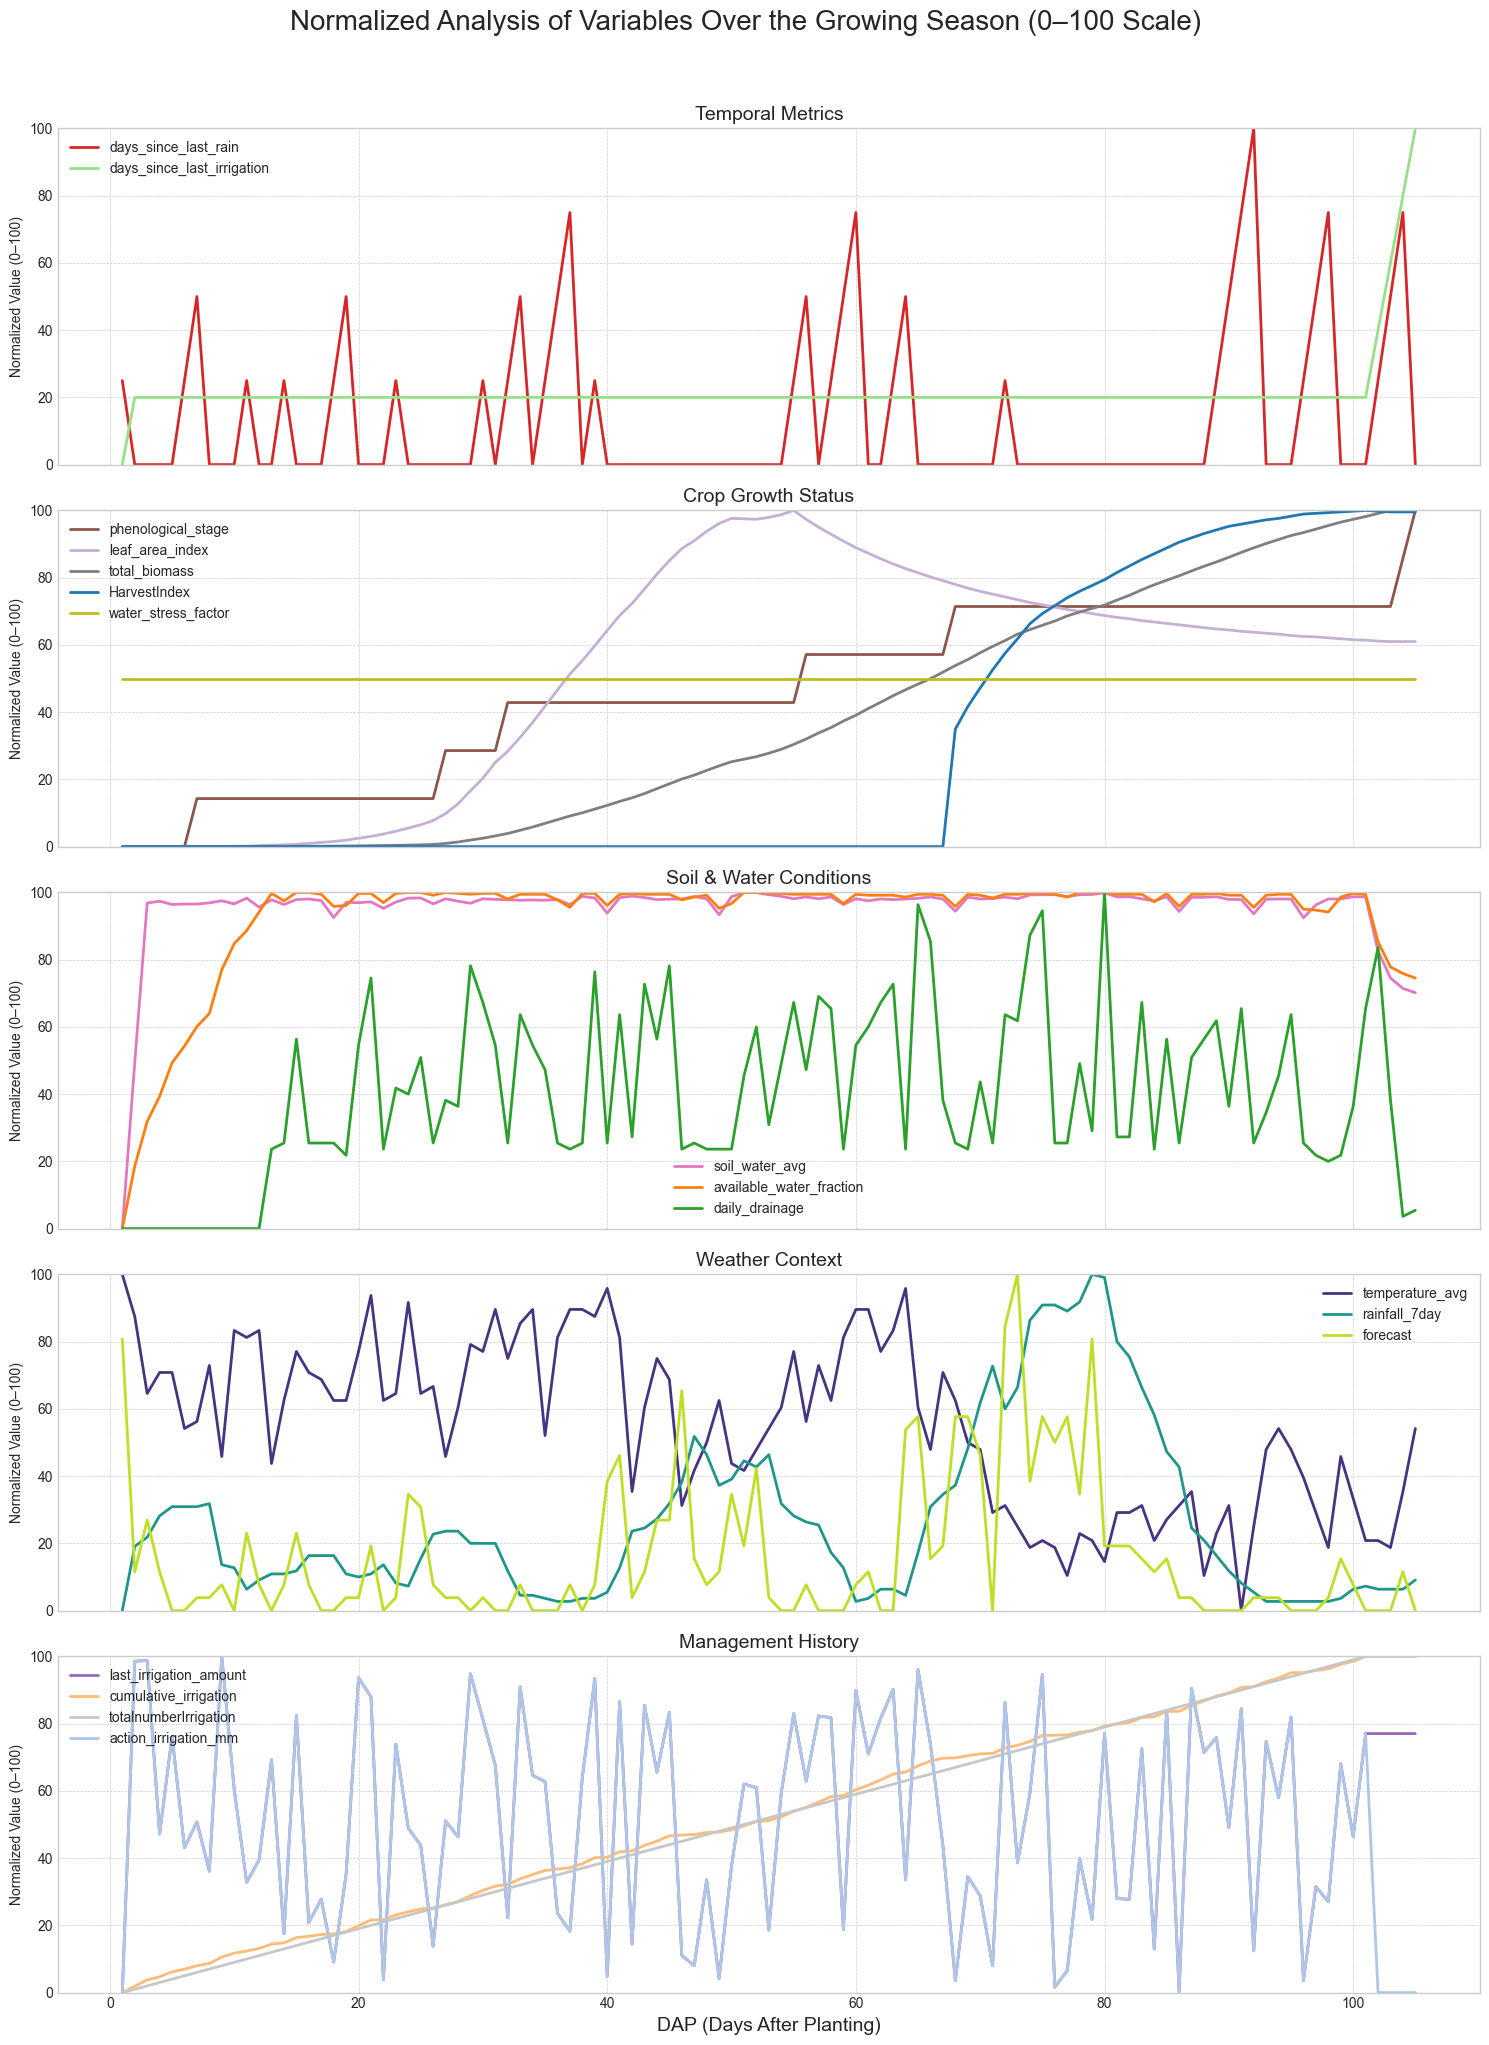


Graph successfully saved as 'normalized_subplots_graph.png'


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
import numpy as np

# --- 1. Define File and Group Columns for Subplots ---
# filename = './onway/episode_logs1/episode_0010_log.csv'
filename = './onway/episode_logs0/episode_0001_log.csv'

subplot_groups = {
    'Temporal Metrics': ['days_since_last_rain', 'days_since_last_irrigation'],
    'Crop Growth Status': ['phenological_stage', 'leaf_area_index', 'total_biomass', 'HarvestIndex', 'water_stress_factor'],
    'Soil & Water Conditions': ['soil_water_avg', 'available_water_fraction', 'daily_drainage'],
    'Weather Context': ['temperature_avg', 'rainfall_7day', 'forecast'],  # 👈 4th subplot
    'Management History': ['last_irrigation_amount', 'cumulative_irrigation', 'totalnumberIrrigation', 'action_irrigation_mm']
}

# --- 2. Base color map for all variables ---
palette = plt.cm.tab20.colors
all_columns = list(itertools.chain.from_iterable(subplot_groups.values()))
color_map = {col: palette[i % len(palette)] for i, col in enumerate(sorted(all_columns))}

# --- 3. Override colors for Weather Context with Viridis ---
weather_cols = subplot_groups['Weather Context']
viridis_palette = plt.cm.viridis(np.linspace(0.15, 0.9, len(weather_cols)))  # vivid, distinct tones
for col, c in zip(weather_cols, viridis_palette):
    color_map[col] = c  # override existing color for weather variables

# --- 4. Read CSV and Prepare Data ---
if os.path.exists(filename):
    df = pd.read_csv(filename)

    # Ensure derived columns exist
    if 'daily_precip' not in df.columns:
        df['daily_precip'] = df['forecast'].shift(1)
        df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    soil_cols = ['soil_water_content_0_30cm', 'soil_water_content_30_60cm', 'soil_water_content_60_100cm']
    df['soil_water_avg'] = df[soil_cols].mean(axis=1)

    # --- 5. Create Subplots ---
    fig, axes = plt.subplots(nrows=len(subplot_groups), ncols=1, figsize=(15, 20), sharex=True)
    plt.style.use('seaborn-v0_8-whitegrid')

    print("Normalizing and plotting variables on separate subplots...")

    for ax, (title, columns) in zip(axes, subplot_groups.items()):
        ax.set_title(title, fontsize=14)
        ax.set_ylabel('Normalized Value (0–100)')
        ax.set_ylim(0, 100)
        ax.grid(True, linestyle='--', linewidth=0.5)

        for column in columns:
            if column in df.columns:
                min_val = df[column].min()
                max_val = df[column].max()
                if (max_val - min_val) > 0:
                    scaled_column = (df[column] - min_val) / (max_val - min_val) * 100
                else:
                    scaled_column = pd.Series([50] * len(df), index=df.index)

                # Use consistent or viridis-based color
                ax.plot(df['DAP'], scaled_column, label=column, lw=2, color=color_map[column])

        ax.legend(loc='best')

    # --- 6. Final Touches ---
    axes[-1].set_xlabel('DAP (Days After Planting)', fontsize=14)
    fig.suptitle('Normalized Analysis of Variables Over the Growing Season (0–100 Scale)', fontsize=20, y=1.02)
    plt.tight_layout()

    output_filename = 'normalized_subplots_graph.png'
    plt.savefig(output_filename, bbox_inches='tight')
    plt.show()

    print(f"\nGraph successfully saved as '{output_filename}'")

else:
    print(f"Error: The file '{filename}' was not found.")


Normalizing and plotting variables on separate subplots...


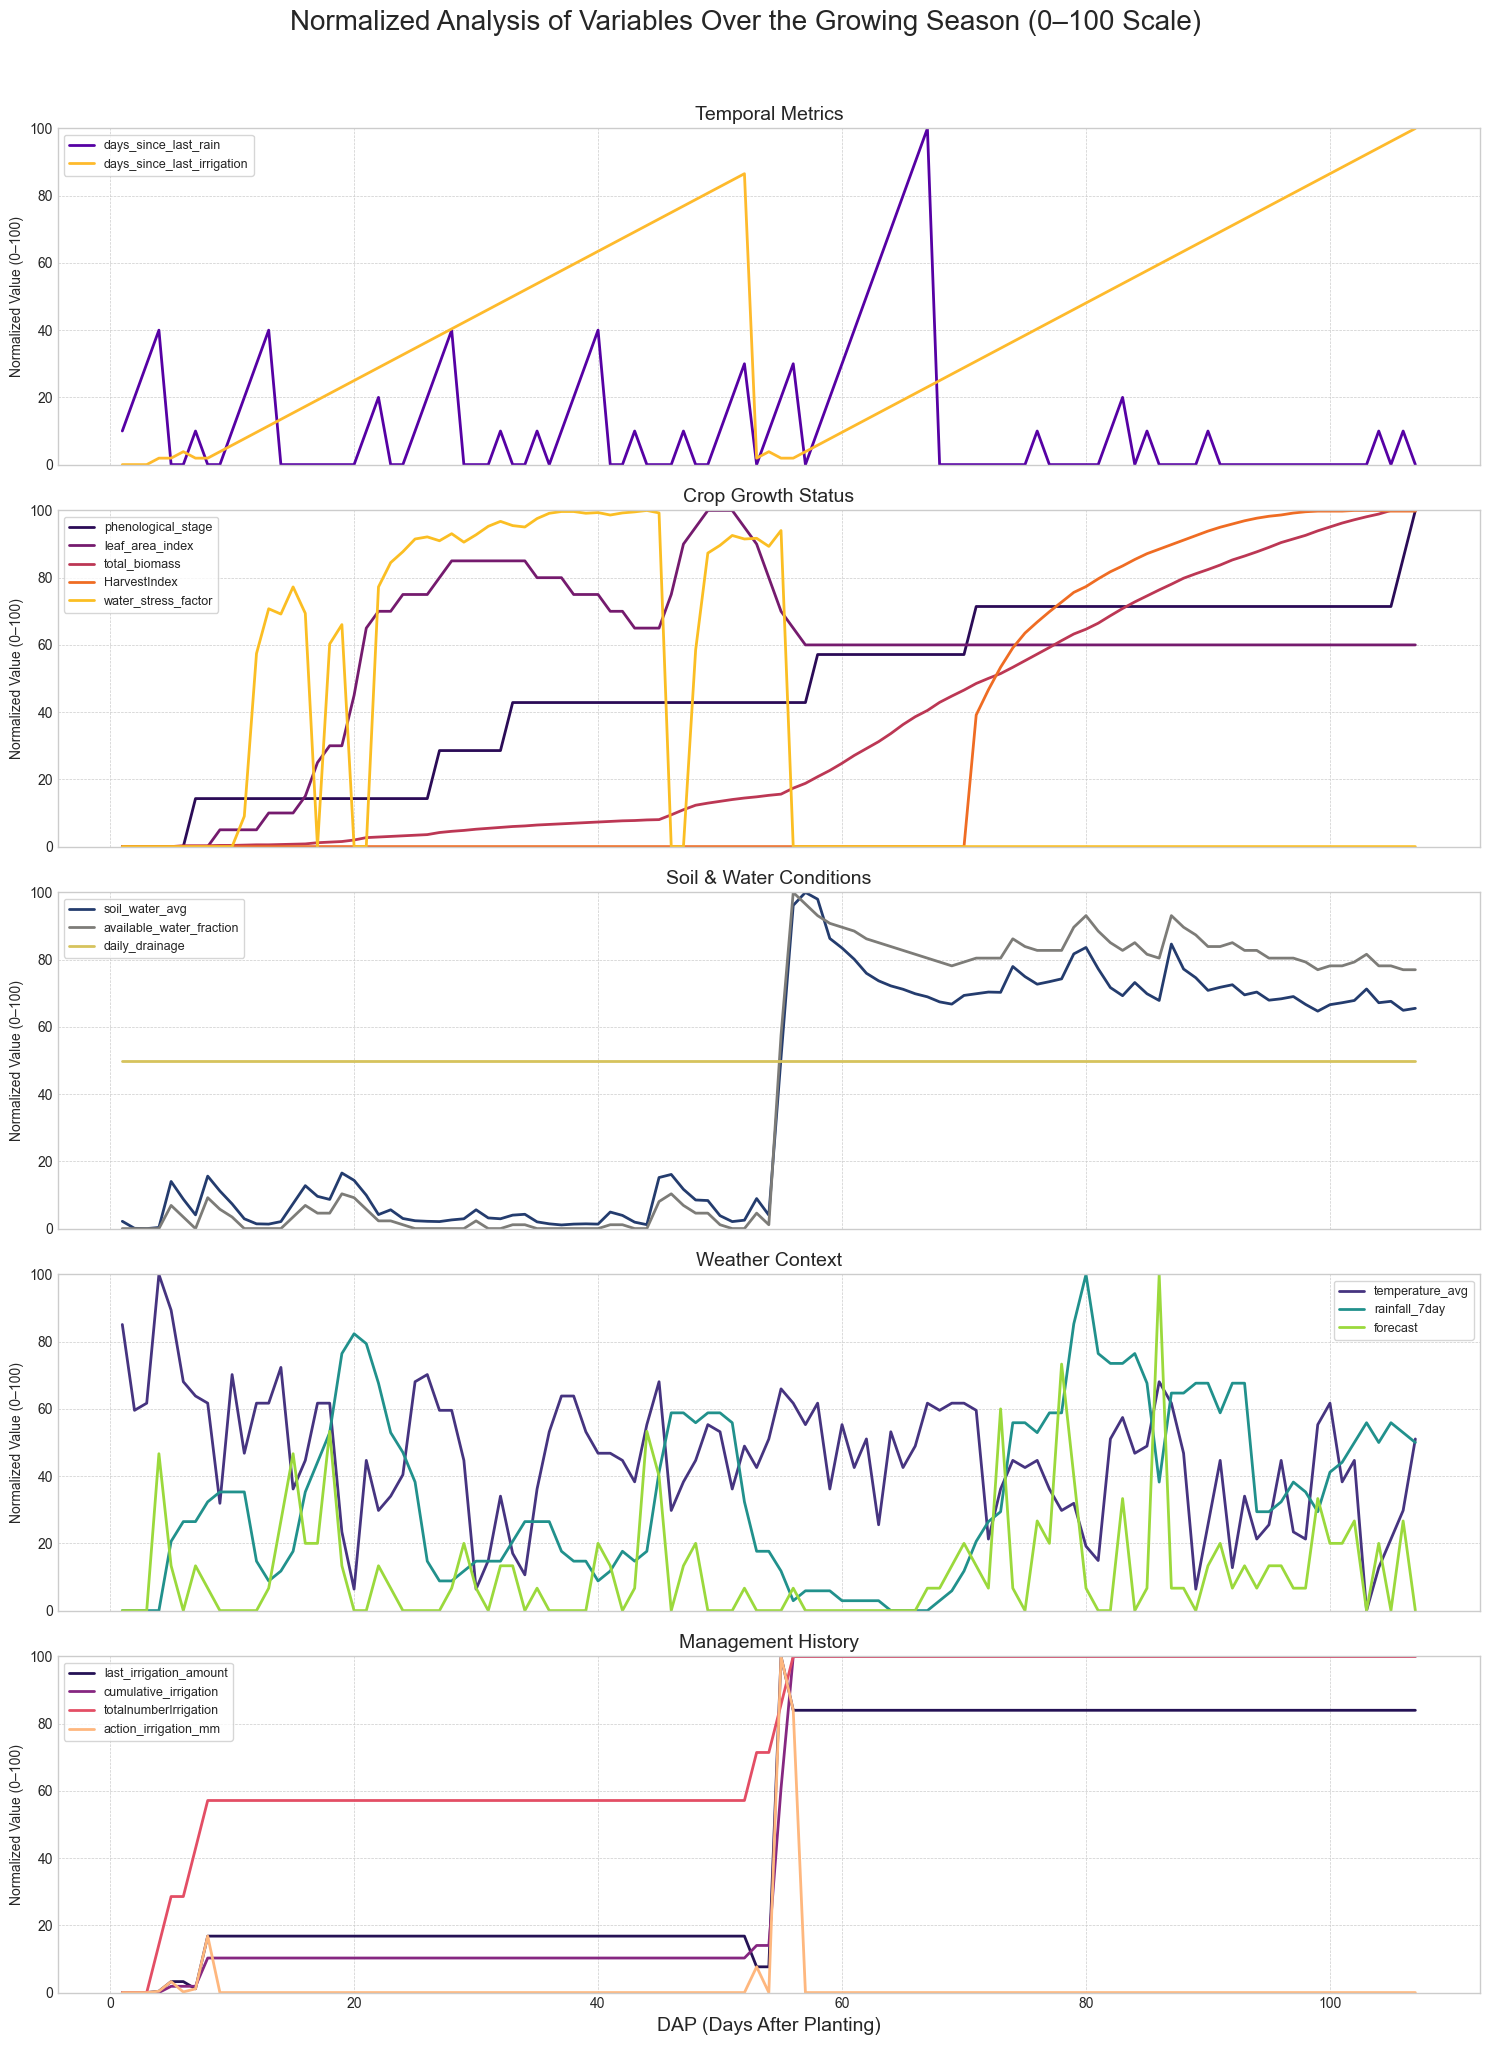


Graph successfully saved as 'normalized_vibrant_subplots.png'


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
import numpy as np

# --- 1. Define File and Group Columns for Subplots ---
filename = './onway/episode_logs2/episode_0003_log.csv'
# filename = './onway/episode_logs0/episode_0001_log.csv'
# filename = './onway/episode_logs1/episode_0010_log.csv'


subplot_groups = {
    'Temporal Metrics': ['days_since_last_rain', 'days_since_last_irrigation'],
    'Crop Growth Status': ['phenological_stage', 'leaf_area_index', 'total_biomass', 'HarvestIndex', 'water_stress_factor'],
    'Soil & Water Conditions': ['soil_water_avg', 'available_water_fraction', 'daily_drainage'],
    'Weather Context': ['temperature_avg', 'rainfall_7day', 'forecast'],
    'Management History': ['last_irrigation_amount', 'cumulative_irrigation', 'totalnumberIrrigation', 'action_irrigation_mm']
}

# --- 2. Assign each subplot a distinct colormap ---
colormaps = {
    'Temporal Metrics': plt.cm.plasma,
    'Crop Growth Status': plt.cm.inferno,
    'Soil & Water Conditions': plt.cm.cividis,
    'Weather Context': plt.cm.viridis,
    'Management History': plt.cm.magma
}

# --- 3. Create consistent color map ---
color_map = {}
for title, columns in subplot_groups.items():
    cmap = colormaps[title]
    n = len(columns)
    colors = cmap(np.linspace(0.15, 0.85, n))  # Avoid washed-out or dark extremes
    for col, c in zip(columns, colors):
        color_map[col] = c

# --- 4. Read CSV and Prepare Data ---
if os.path.exists(filename):
    df = pd.read_csv(filename)

    if 'daily_precip' not in df.columns:
        df['daily_precip'] = df['forecast'].shift(1)
        df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']

    soil_cols = ['soil_water_content_0_30cm', 'soil_water_content_30_60cm', 'soil_water_content_60_100cm']
    df['soil_water_avg'] = df[soil_cols].mean(axis=1)

    # --- 5. Plot setup ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(nrows=len(subplot_groups), ncols=1, figsize=(15, 20), sharex=True)

    print("Normalizing and plotting variables on separate subplots...")

    for ax, (title, columns) in zip(axes, subplot_groups.items()):
        ax.set_title(title, fontsize=14)
        ax.set_ylabel('Normalized Value (0–100)')
        ax.set_ylim(0, 100)
        ax.grid(True, linestyle='--', linewidth=0.5)

        for column in columns:
            if column in df.columns:
                min_val, max_val = df[column].min(), df[column].max()
                scaled = ((df[column] - min_val) / (max_val - min_val) * 100) if max_val > min_val else [50]*len(df)
                ax.plot(df['DAP'], scaled, label=column, lw=2, color=color_map[column])

        ax.legend(loc='best', fontsize=9, frameon=True)

    axes[-1].set_xlabel('DAP (Days After Planting)', fontsize=14)
    fig.suptitle('Normalized Analysis of Variables Over the Growing Season (0–100 Scale)', fontsize=20, y=1.02)
    plt.tight_layout()

    output_filename = 'normalized_vibrant_subplots.png'
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()

    print(f"\nGraph successfully saved as '{output_filename}'")

else:
    print(f"Error: The file '{filename}' was not found.")


In [42]:
import pandas as pd
import os

# --- 1. Define Directories and Column to Check ---

# List of directories provided by the user
directories_to_check = [
    r'D:\Final-Year-Project\rl-trails\onway\episode_logs0',
    r'D:\Final-Year-Project\rl-trails\onway\episode_logs1',
    r'D:\Final-Year-Project\rl-trails\onway\episode_logs2',
    r'D:\Final-Year-Project\rl-trails\onway\episode_logs3'
]

# The column we are interested in
column_to_check = 'action_irrigation_mm'

# --- 2. Analysis Function ---

def find_dirs_with_varying_values(directories, column):
    """
    Analyzes CSV files in a list of directories to find which ones have 
    varying values in a specific column.
    """
    # A list to store the directories that meet the condition
    dirs_with_variation = []

    # Loop through each directory path
    for directory in directories:
        print(f"--- Scanning Directory: {directory} ---")
        
        # A flag to check if variation is found in the current directory
        variation_found_in_dir = False
        
        # Check if the path is a valid directory
        if not os.path.isdir(directory):
            print(f"  [Warning] Path is not a valid directory. Skipping.")
            continue

        # Iterate over each file in the directory
        for filename in os.listdir(directory):
            # Process only CSV files
            if filename.endswith('.csv'):
                file_path = os.path.join(directory, filename)
                
                try:
                    # Read the CSV into a DataFrame
                    df = pd.read_csv(file_path)
                    
                    # Check if the column exists in the DataFrame
                    if column in df.columns:
                        # Check if there is more than one unique value in the column
                        # .nunique() is efficient for this check
                        if df[column].nunique() > 1:
                            print(f"  [Found] Varying values in '{filename}'")
                            variation_found_in_dir = True
                            # Once variation is found, no need to check other files in this dir
                            break 
                    else:
                        print(f"  [Info] Column '{column}' not found in '{filename}'.")

                except Exception as e:
                    print(f"  [Error] Could not process file '{filename}': {e}")
        
        # If variation was found in any file, add the directory to our results list
        if variation_found_in_dir:
            dirs_with_variation.append(directory)
            print(f"--- Result: Variation found in this directory. ---\n")
        else:
            print(f"--- Result: No variation found in this directory. ---\n")
            
    return dirs_with_variation

# --- 3. Run Analysis and Print Results ---

print("Starting analysis to find directories with varying irrigation actions...\n")
varying_dirs = find_dirs_with_varying_values(directories_to_check, column_to_check)

print("\n--- FINAL SUMMARY ---")
if varying_dirs:
    print("Directories with varying 'action_irrigation_mm' values are:")
    for dir_path in varying_dirs:
        print(f"  - {dir_path}")
else:
    print("No directories were found with varying 'action_irrigation_mm' values.")


Starting analysis to find directories with varying irrigation actions...

--- Scanning Directory: D:\Final-Year-Project\rl-trails\onway\episode_logs0 ---
  [Found] Varying values in 'episode_0001_log.csv'
--- Result: Variation found in this directory. ---

--- Scanning Directory: D:\Final-Year-Project\rl-trails\onway\episode_logs1 ---
  [Found] Varying values in 'episode_0001_log.csv'
--- Result: Variation found in this directory. ---

--- Scanning Directory: D:\Final-Year-Project\rl-trails\onway\episode_logs2 ---
  [Found] Varying values in 'episode_0001_log.csv'
--- Result: Variation found in this directory. ---

--- Scanning Directory: D:\Final-Year-Project\rl-trails\onway\episode_logs3 ---
  [Found] Varying values in 'episode_0001_log.csv'
--- Result: Variation found in this directory. ---


--- FINAL SUMMARY ---
Directories with varying 'action_irrigation_mm' values are:
  - D:\Final-Year-Project\rl-trails\onway\episode_logs0
  - D:\Final-Year-Project\rl-trails\onway\episode_logs1

In [47]:
import pandas as pd
import os
import sys

# --- 1. Define Directories to Search ---

directories_to_check = [
    r'D:\Final-Year-Project\rl-trails\onway\episode_logs0',
    r'D:\Final-Year-Project\rl-trails\onway\episode_logs1',
    r'D:\Final-Year-Project\rl-trails\onway\episode_logs2',
    r'D:\Final-Year-Project\rl-trails\onway\episode_logs3'
]

# --- 2. Analysis Function to Find Minimum Rainfall ---

def find_file_with_least_rainfall(directories):
    """
    Finds the CSV file with the lowest total 'daily_precip' across multiple directories.
    """
    # Initialize variables to keep track of the minimum found so far
    min_total_precip = float('inf')
    file_with_min_precip = None

    # Loop through each directory
    for directory in directories:
        print(f"--- Scanning Directory: {directory} ---")
        if not os.path.isdir(directory):
            print(f"  [Warning] Not a valid directory. Skipping.")
            continue

        # Loop through each file in the directory
        for filename in os.listdir(directory):
            if filename.endswith('.csv'):
                file_path = os.path.join(directory, filename)
                
                try:
                    df = pd.read_csv(file_path)

                    # a. Ensure 'daily_precip' column exists
                    if 'daily_precip' not in df.columns:
                        # If not, create it using the established logic
                        if 'forecast' in df.columns and 'rainfall_7day' in df.columns:
                            df['daily_precip'] = df['forecast'].shift(1)
                            df.loc[0, 'daily_precip'] = df.loc[0, 'rainfall_7day']
                        else:
                            # If it can't be created, skip this file
                            print(f"  [Info] Cannot calculate precipitation for '{filename}'. Skipping.")
                            continue
                    
                    # b. Calculate the total precipitation for the file
                    total_precip = df['daily_precip'].sum()
                    
                    # c. Check if this is the new minimum
                    if total_precip < min_total_precip:
                        min_total_precip = total_precip
                        file_with_min_precip = file_path
                        print(f"  [New Minimum] Found new minimum precipitation: {total_precip:.2f} mm in '{filename}'")

                except Exception as e:
                    print(f"  [Error] Could not process file '{filename}': {e}")

    return file_with_min_precip, min_total_precip

# --- 3. Run Analysis and Print Final Result ---

print("Starting analysis to find the file with the least total rainfall...\n")
min_file, min_value = find_file_with_least_rainfall(directories_to_check)

print("\n--- FINAL RESULT ---")
if min_file:
    print(f"The file with the least total rainfall is:")
    print(f"  - Path: {min_file}")
    print(f"  - Total Daily Precipitation: {min_value:.2f} mm")
else:
    print("Could not find a suitable CSV file to analyze.")


Starting analysis to find the file with the least total rainfall...

--- Scanning Directory: D:\Final-Year-Project\rl-trails\onway\episode_logs0 ---
  [New Minimum] Found new minimum precipitation: 443.00 mm in 'episode_0001_log.csv'
  [New Minimum] Found new minimum precipitation: 324.00 mm in 'episode_0002_log.csv'
--- Scanning Directory: D:\Final-Year-Project\rl-trails\onway\episode_logs1 ---
  [New Minimum] Found new minimum precipitation: 255.00 mm in 'episode_0008_log.csv'
--- Scanning Directory: D:\Final-Year-Project\rl-trails\onway\episode_logs2 ---
  [New Minimum] Found new minimum precipitation: 185.00 mm in 'episode_0003_log.csv'
--- Scanning Directory: D:\Final-Year-Project\rl-trails\onway\episode_logs3 ---

--- FINAL RESULT ---
The file with the least total rainfall is:
  - Path: D:\Final-Year-Project\rl-trails\onway\episode_logs2\episode_0003_log.csv
  - Total Daily Precipitation: 185.00 mm
